# Facebook Stocks

### Loading Packages:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe = FB_dataframe.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [4]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close_x']

In [5]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Close'] = temp['Close_x']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Close'] = temp['Close_x']

In [6]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']

In [7]:
#Datetime
FB_dataframe.dropna(inplace=True)
FB_dataframe['ordinal'] = FB_dataframe['Date'].apply(lambda x: x.toordinal())

FB_dataframe

,Date,Close,FB MAU (millions),TWTR Close,SNAP Close,Apple Close,Google Close,FB Net Income (millions),FB Lobbying (millions),ordinal
0,2012-05-18,38.230000,955,38.230000,38.230000,38.230000,38.230000,-157,0.96,734641
1,2012-05-21,34.029999,955,34.029999,34.029999,34.029999,34.029999,-157,0.96,734644
2,2012-05-22,31.000000,955,31.000000,31.000000,31.000000,31.000000,-157,0.96,734645
3,2012-05-23,32.000000,955,32.000000,32.000000,32.000000,32.000000,-157,0.96,734646
4,2012-05-24,33.029999,955,33.029999,33.029999,33.029999,33.029999,-157,0.96,734647
...,...,...,...,...,...,...,...,...,...,...
2354,2021-09-27,353.579987,2910,353.579987,353.579987,353.579987,353.579987,9194,5.09,738060
2355,2021-09-28,340.649994,2910,340.649994,340.649994,340.649994,340.649994,9194,5.09,738061
2356,2021-09-29,339.609985,2910,339.609985,339.609985,339.609985,339.609985,9194,5.09,738062
2357,2021-09-30,339.390015,2910,339.390015,339.390015,339.390015,339.390015,9194,5.09,738063


### Basic Plots

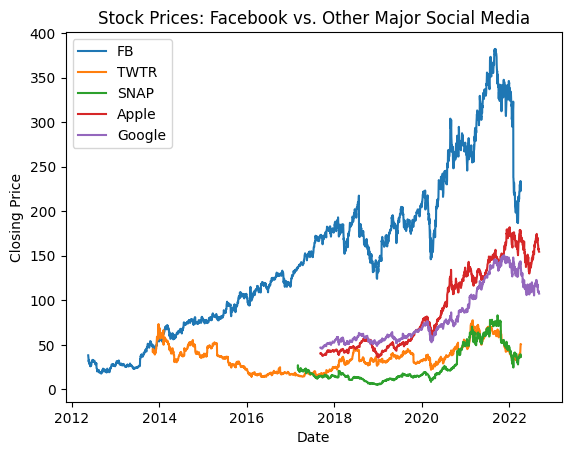

In [8]:
# Closing prices of Facebook vs Other Companies (2012-2022)
copanies = ['FB', 'TWTR', 'SNAP']
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    plt.plot(company_df['Date'], company_df['Close'], label=company)
plt.plot(apple_dataframe['Date'], apple_dataframe['Close'], label='Apple')
plt.plot(google_dataframe['Date'], google_dataframe['Close'], label='Google')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

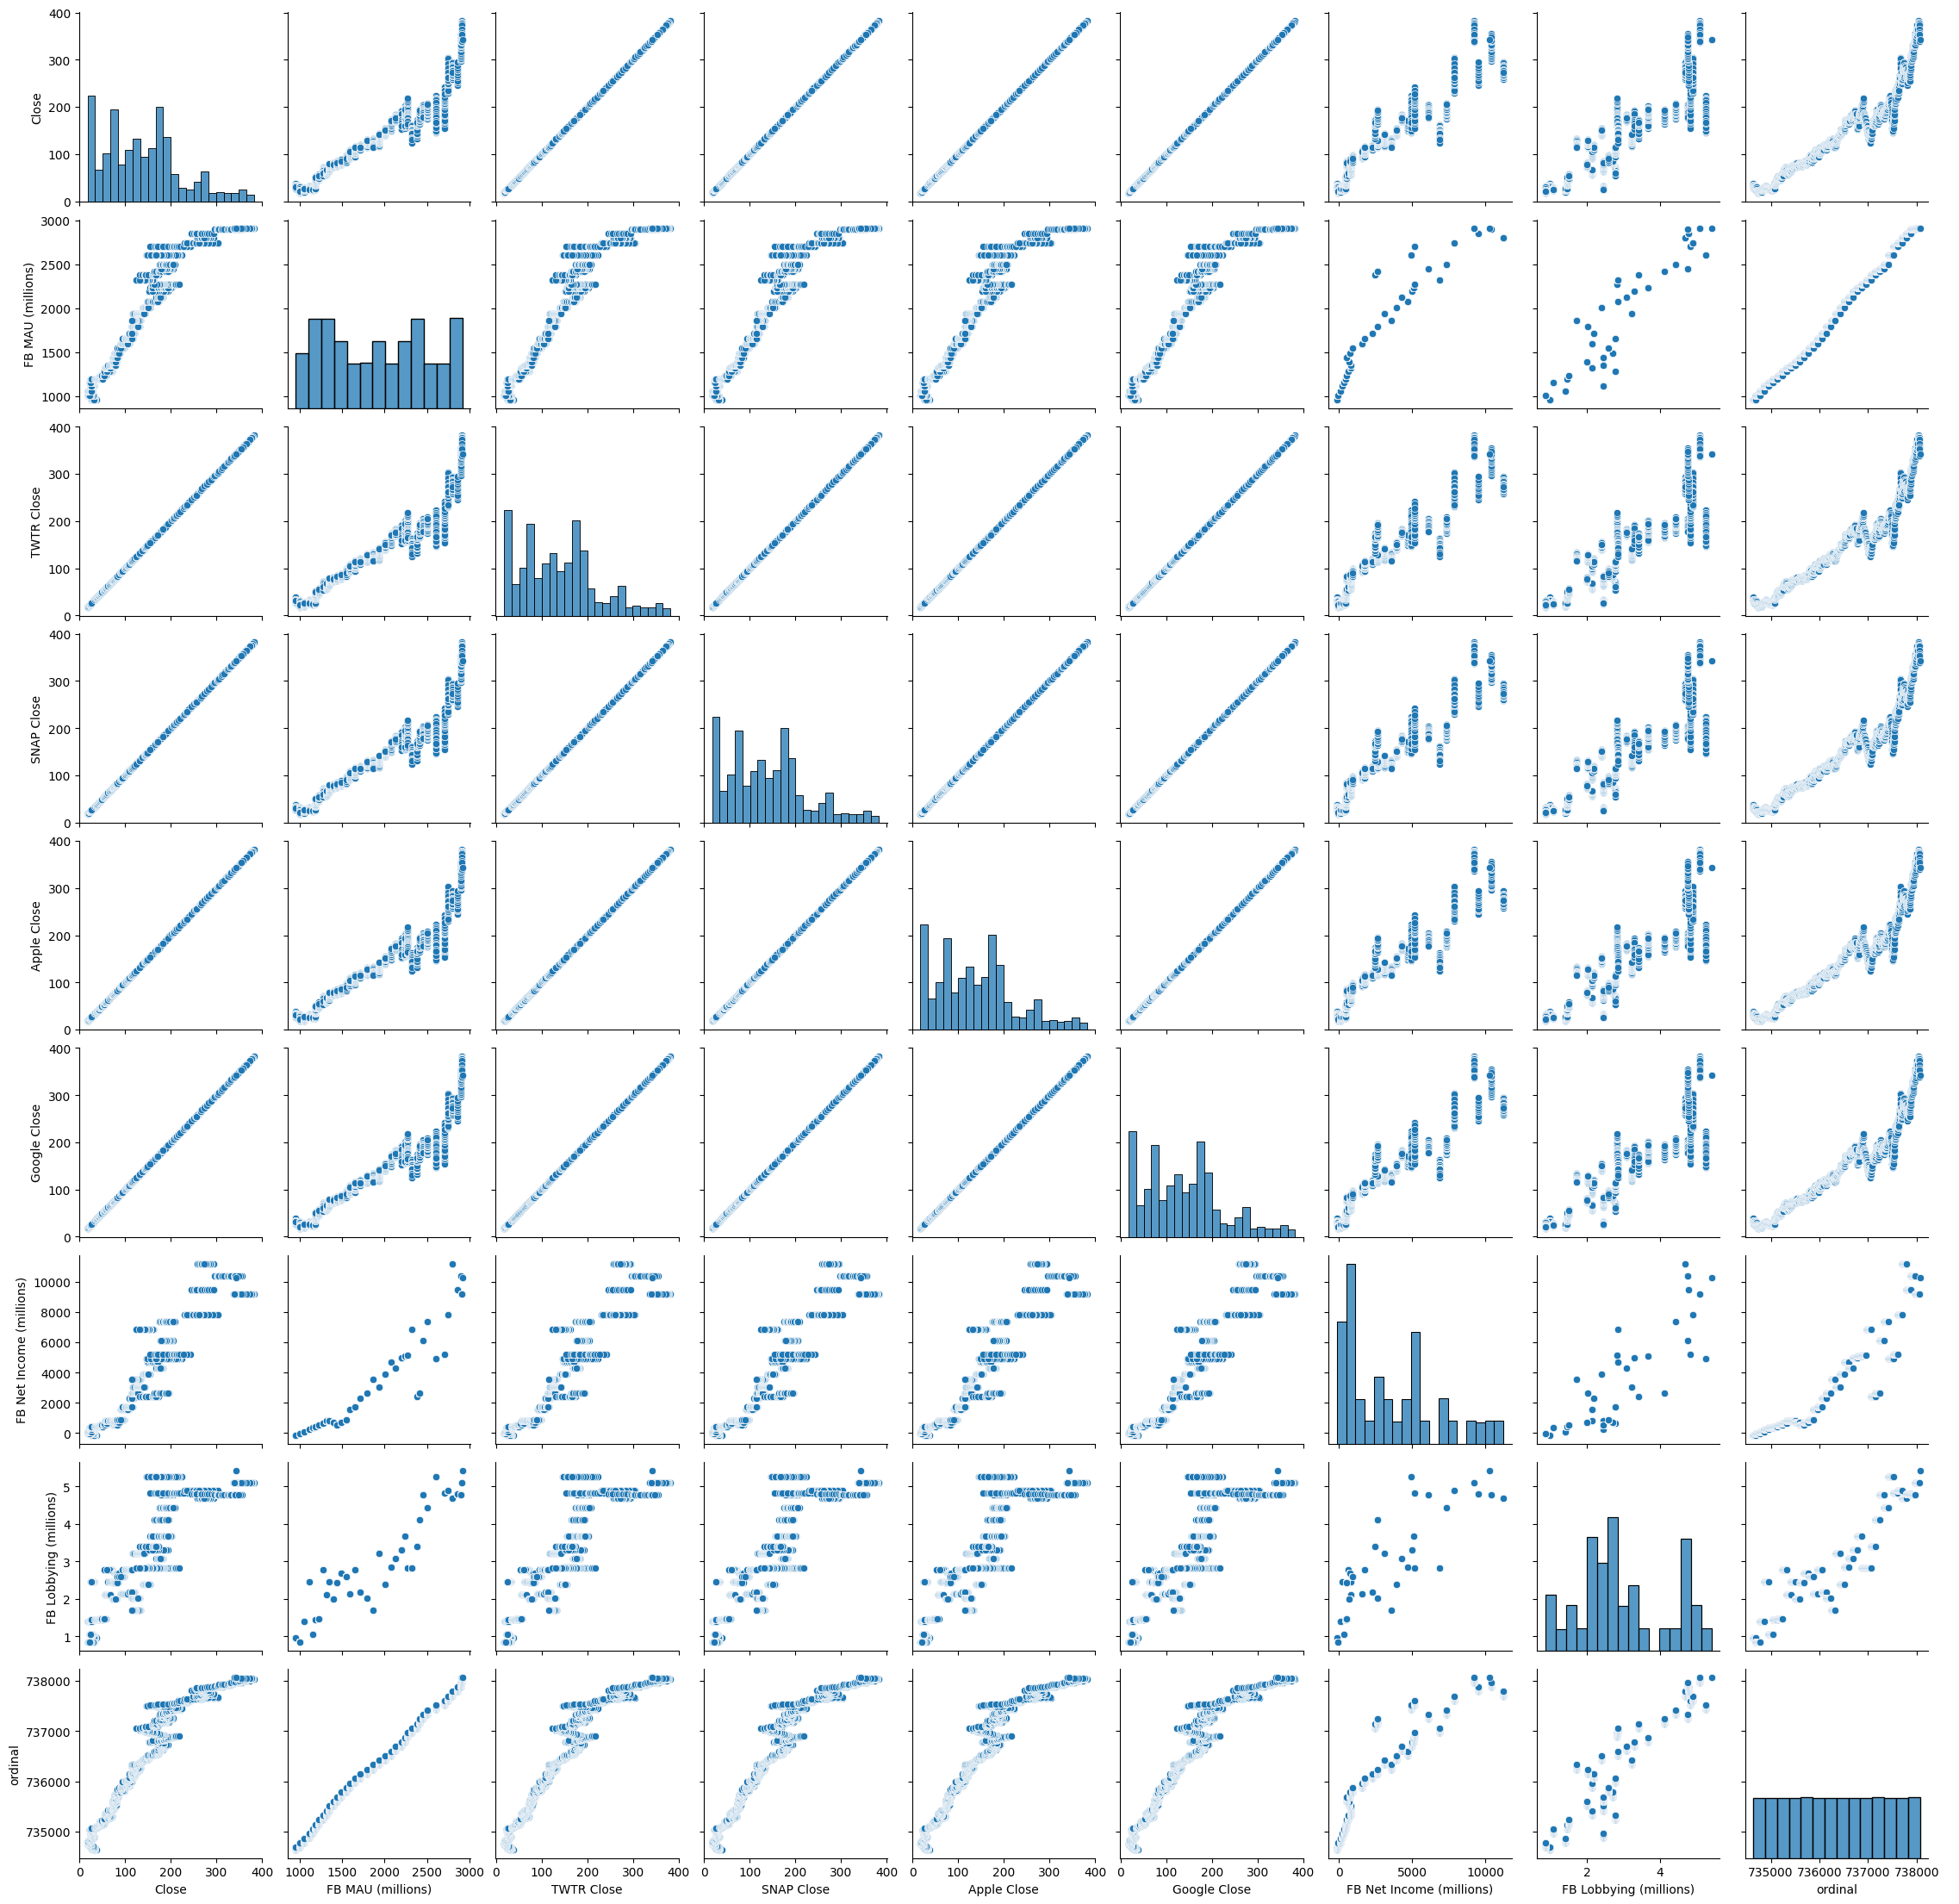

In [9]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Train Model and Predict

Simple Linear Regression (FB Closing Price vs. Datetime)
(https://www.w3schools.com/python/python_ml_multiple_regression.asp)

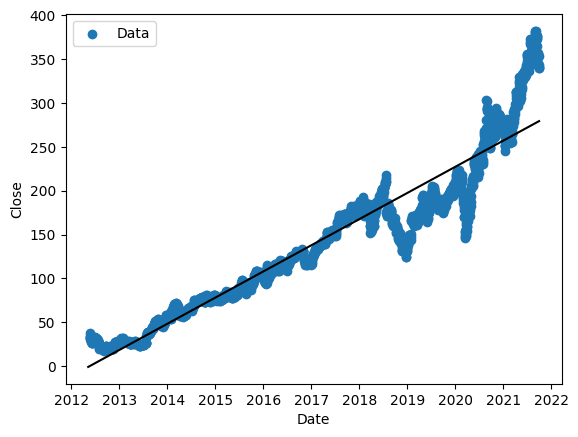

Mean squared error:  595.4567779775366
Root Mean squared error:  24.401983074691625


In [10]:
from sklearn import linear_model
import datetime as dt

# Split and Train Data
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regr = linear_model.LinearRegression()
regr.fit(X_train.values, y_train.values)

# plot data
fig, ax = plt.subplots()
ax.scatter(FB_dataframe['Date'], FB_dataframe['Close'], label='Data')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
ax.legend()

# plot pred
date_range = pd.date_range(start='2012-05-08', end='2021-10-01', freq='D')
ordinal_range = date_range.to_series().apply(lambda date: date.toordinal())
y_pred = regr.predict(ordinal_range.to_numpy().reshape(-1, 1))
ax.plot(date_range, y_pred, color='k')

plt.show()

# Evaluate the performance of the model using mean squared error
y_pred_test = regr.predict(X_test.values)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print('Mean squared error: ', mse)
print('Root Mean squared error: ', rmse)

Support Vector Regression (FB Closing Price vs. Datetime, Income)

In [12]:
from datetime import date
import matplotlib.dates as mdates

def SVR_predict_plot(X_train, X_test, y_train, y_test, svr):
    # Train the model using the training data
    svr.fit(X_train.values, y_train.values)
    
    # Convert date time
    X_date = X_test['ordinal']
    y_pred_test = svr.predict(X_test.values)
    datetime_array = np.array([date.fromordinal(ordinal) for ordinal in X_date.values.flatten()])

    # Evaluate the performance of the model using mean squared error
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    print('Mean squared error: ', mse)
    print('Root Mean squared error: ', rmse)

    # sort data by date
    sort_index = np.argsort(X_test['ordinal'])
    datetime_array = datetime_array[sort_index]
    y_pred_test = y_pred_test[sort_index]

    original_x = mdates.date2num(FB_dataframe['Date'])
    sort_index = np.argsort(original_x)
    original_x = original_x[sort_index]
    original_y = FB_dataframe['Close'][sort_index]
    
    # Plot Original
    fig, ax = plt.subplots()
    ax.plot(original_x, original_y, label='Actual')
    ax.plot(datetime_array, y_pred_test, label='Prediction')
    ax.set_xlabel('Date')
    ax.set_ylabel('Close')
    ax.legend()
    plt.show()

Mean squared error:  39.322804601626174
Root Mean squared error:  6.270789790897648


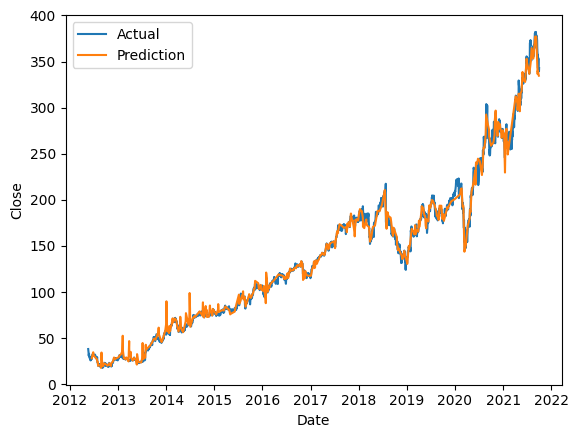

In [15]:
# Support Vector Machines (DateTime vs Closing Price)
X = FB_dataframe[['ordinal']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Predict and Plot
SVR_predict_plot(X_train, X_test, y_train, y_test, svr)

Mean squared error:  74.00401904496529
Root Mean squared error:  8.602558866114506


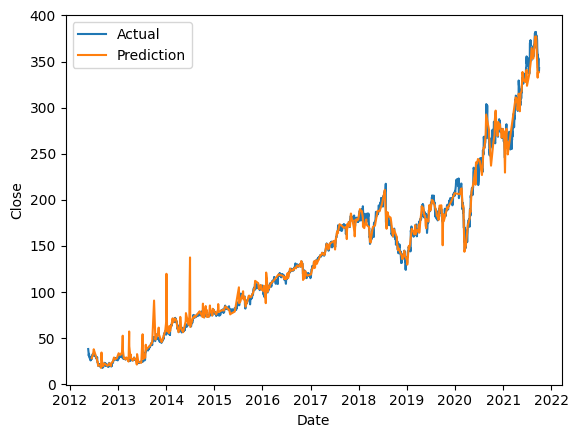

In [14]:
# Support Vector Machines (DateTime, Net Income vs Closing Price)
X = FB_dataframe[['ordinal', 'FB Net Income (millions)']]
y = FB_dataframe['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create SVR model
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Predict and Plot
SVR_predict_plot(X_train, X_test, y_train, y_test, svr)

### Evaluate Accuracy